In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Chemins vers les dossiers contenant les images
#varroas_folder = "base/varroas_crop_20/"
#non_varroas_folder = "base/non_varroas_crop_20/"
varroas_folder = "D:/base/varroas_crop_20/"
non_varroas_folder = "D:/base/non_varroas_crop_20/"


# Récupération des chemins des images dans chaque dossier
varroas_images = [os.path.join(varroas_folder, image_file) for image_file in os.listdir(varroas_folder)]
non_varroas_images = [os.path.join(non_varroas_folder, image_file) for image_file in os.listdir(non_varroas_folder)]

# Labels correspondants pour chaque classe
varroas_labels = [0] * len(varroas_images)  # Classe 0 pour les varroas
non_varroas_labels = [1] * len(non_varroas_images)  # Classe 1 pour les non-varroas

# Concaténation des données et des labels
images = varroas_images + non_varroas_images
labels = varroas_labels + non_varroas_labels

# Convertir les images en tableaux et les redimensionner si nécessaire
resized_images = []
for image_path in images:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (11, 11))  # dimensions souhaitées
    resized_images.append(resized_image)

# Convertir la liste en tableau numpy
X = np.array(resized_images)
y = np.array(labels)
print(y)
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0 0 0 ... 1 1 1]


In [5]:
# Check if classes are balanced
import numpy as np

# Assuming y_train and y_test are NumPy arrays
train_class_counts = np.unique(y_train, return_counts=True)[1]
test_class_counts = np.unique(y_test, return_counts=True)[1]

# Check if classes are balanced in the training set
is_train_balanced = np.min(train_class_counts) / np.max(train_class_counts) >= 0.9

# Check if classes are balanced in the testing set
is_test_balanced = np.min(test_class_counts) / np.max(test_class_counts) >= 0.9

# Print the result
print("Training set balanced:", is_train_balanced)
print("Testing set balanced:", is_test_balanced)

Training set balanced: True
Testing set balanced: True


In [6]:
#Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3) ,input_shape = (11,11,3),activation = 'relu'),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_acc = []
train_mean_acc = []
train_std_acc = []

test_acc = []
test_mean_acc = []
test_std_acc = []

for rep in range(5):
    model.fit(X_train, y_train, epochs=20, batch_size=50,verbose=False)
    results = model.evaluate(X_train, y_train)
    print(f"Metrics on training set for run {rep+1}: loss={results[0]}, accuracy={results[1]}" )
    train_acc.append(results[1])
    train_mean_acc.append(np.mean(train_acc))
    train_std_acc.append(np.std(train_acc))

    results_test = model.evaluate(X_test, y_test)
    print(f"Metrics on test set for run {rep+1}: loss={results_test[0]}, accuracy={results_test[1]}" )
    test_acc.append(results[1])
    test_mean_acc.append(np.mean(test_acc))
    test_std_acc.append(np.std(test_acc))


print('train mean accuracy = ', np.mean(train_acc))
print('train std accuracy  = ', np.std(train_acc))
print('test mean accuracy = ', np.mean(test_acc))
print('test std accuracy  = ', np.std(test_acc))

305/305 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9989
Metrics on training set for run 1: loss=0.0045893872156739235, accuracy=0.9988729357719421
131/131 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9969
Metrics on test set for run 1: loss=0.014695274643599987, accuracy=0.9968929290771484
305/305 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9759
Metrics on training set for run 2: loss=0.06913544982671738, accuracy=0.9759221076965332
131/131 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9771
Metrics on test set for run 2: loss=0.07927859574556351, accuracy=0.9770554304122925
305/305 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9969
Metrics on training set for run 3: loss=0.010341150686144829, accuracy=0.9969262480735779
131/131 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9926
Metrics on test set for r

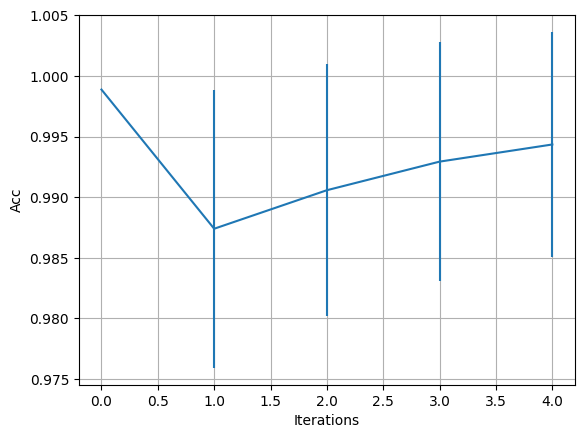

In [7]:
fig, ax = plt.subplots()
ax.errorbar(range(5), train_mean_acc, train_std_acc)
plt.xlabel('Iterations')
plt.ylabel('Acc')
plt.grid()
plt.show()

## Metrics

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_train, y_train

# Predict labels for training data
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred >= 0.5).astype(int)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_cm = confusion_matrix(y_train, y_train_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)
print("Training Confusion Matrix:")
print(train_cm)

305/305 [==============================] - 0s 1ms/step
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-Score: 1.0
Training Confusion Matrix:
[[4902    0]
 [   0 4858]]


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_test, y_test

# Predict labels for test data
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred >= 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1-Score:", test_f1)
print("Testing Confusion Matrix:")
print(test_cm)

131/131 [==============================] - 0s 1ms/step
Testing Accuracy: 0.9976099426386233
Testing Precision: 0.9976099426386233
Testing Recall: 0.9976099426386233
Testing F1-Score: 0.9976099426386233
Testing Confusion Matrix:
[[2065    5]
 [   5 2109]]


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

131/131 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9976
Test accuracy: 0.9976099133491516


131/131 [==============================] - 0s 2ms/step


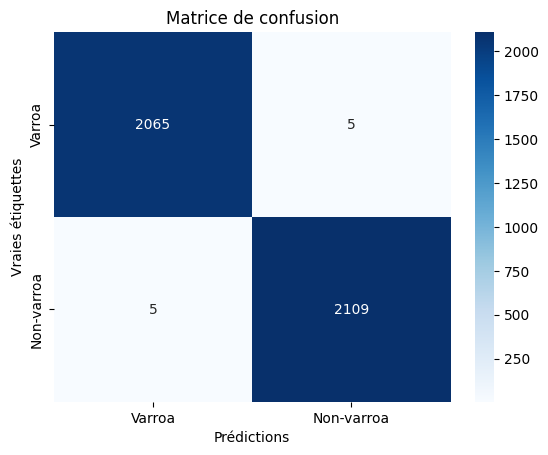

In [11]:
# Supposez que vous avez entraîné votre modèle et obtenu les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

# Créer la matrice de confusion
confusion_matrix = confusion_matrix(y_test, y_pred_binary)

# Définir les étiquettes de classe
class_labels = ['Varroa', 'Non-varroa']  # Remplacez les noms des classes par les vôtres

# Créer une heatmap de la matrice de confusion
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')

# Afficher la figure
plt.show()


